In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\mavur\OneDrive\Desktop\Personal Projects\Datasets\movies.csv')

In [4]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [24]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) # mean() method to calculate the proportion of missing values for each column.
    print(col,round(pct_missing*100))

name 0
rating 1
genre 0
year 0
released 0
score 0
votes 0
director 0
writer 0
star 0
country 0
budget 28
gross 2
company 0
runtime 0


In [28]:
num_missing_values1 = df['budget'].isnull().sum()
num_missing_values2 = df['gross'].isnull().sum()
num_missing_values3 = df['rating'].isnull().sum()
# print the result
print('Number of missing values in the "budget" column:', num_missing_values1)
print('Number of missing values in the "gross" column:', num_missing_values2)
print('Number of missing values in the "rating" column:', num_missing_values3)

Number of missing values in the "budget" column: 2171
Number of missing values in the "gross" column: 189
Number of missing values in the "rating" column: 77


In [36]:
# create a list of column names
columns = ['budget', 'gross', 'rating']

# iterate over the column names and print the number of missing values for each column
for col in columns:
    num_missing = df[col].isnull().sum()
    print('Number of missing values in the "{}" column: {}'.format(col, num_missing))


Number of missing values in the "budget" column: 0
Number of missing values in the "gross" column: 0
Number of missing values in the "rating" column: 0


In [35]:
mean_budget = df['budget'].mean()
df['budget'].fillna(mean_budget, inplace=True)

mean_gross = df['gross'].mean()
df['gross'].fillna(mean_gross, inplace=True)

mode_rating = df['rating'].mode()[0]
df['rating'].fillna(mode_rating, inplace=True)


In [37]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) # mean() method to calculate the proportion of missing values for each column.
    print(col,round(pct_missing*100))


name 0
rating 0
genre 0
year 0
released 0
score 0
votes 0
director 0
writer 0
star 0
country 0
budget 0
gross 0
company 0
runtime 0


In [38]:
print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [39]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [130]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [128]:
#Creating correct year column

df['year_corrected'] = df['released'].str.extract(r'(\d{4})')
df.head()



,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [129]:
top_gross = df.sort_values(by=["gross"],inplace=False,ascending=False)

top_gross.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [66]:
pd.set_option('display.max_rows',None)

In [69]:
num_duplicates = df.duplicated().sum()

print(f'There are {num_duplicates} duplicate rows in the DataFrame.')

There are 0 duplicate rows in the DataFrame.


In [127]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


<function matplotlib.pyplot.show(close=None, block=None)>

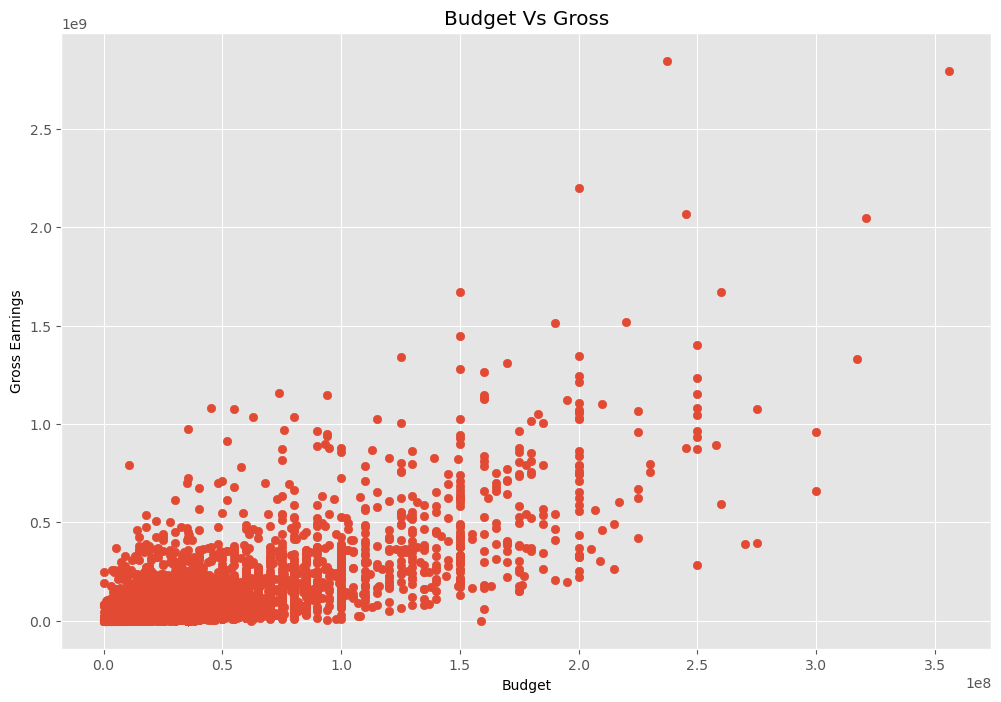

In [71]:
#ScatterPlot budget vs gross

plt.scatter(x=df["budget"],y=df["gross"])

plt.title("Budget Vs Gross")

plt.xlabel("Budget")

plt.ylabel("Gross Earnings")

plt.show

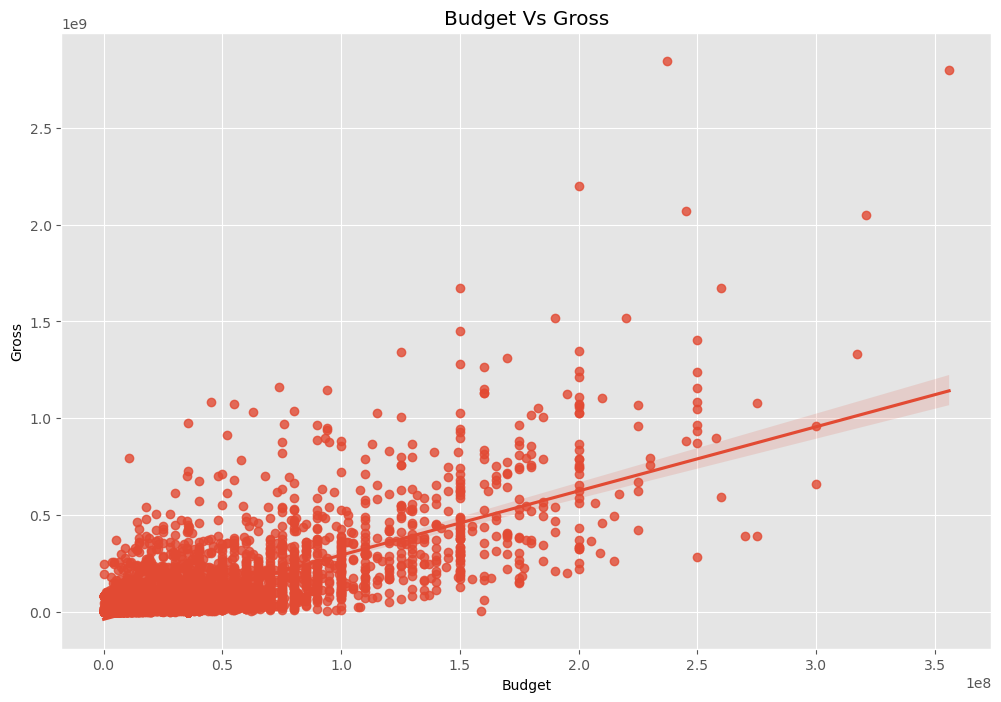

In [79]:
import seaborn as sns

# create the regression plot
sns.regplot(x=df["budget"], y=df["gross"])

# add labels and title
plt.title("Budget Vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")

# display the plot
plt.show()


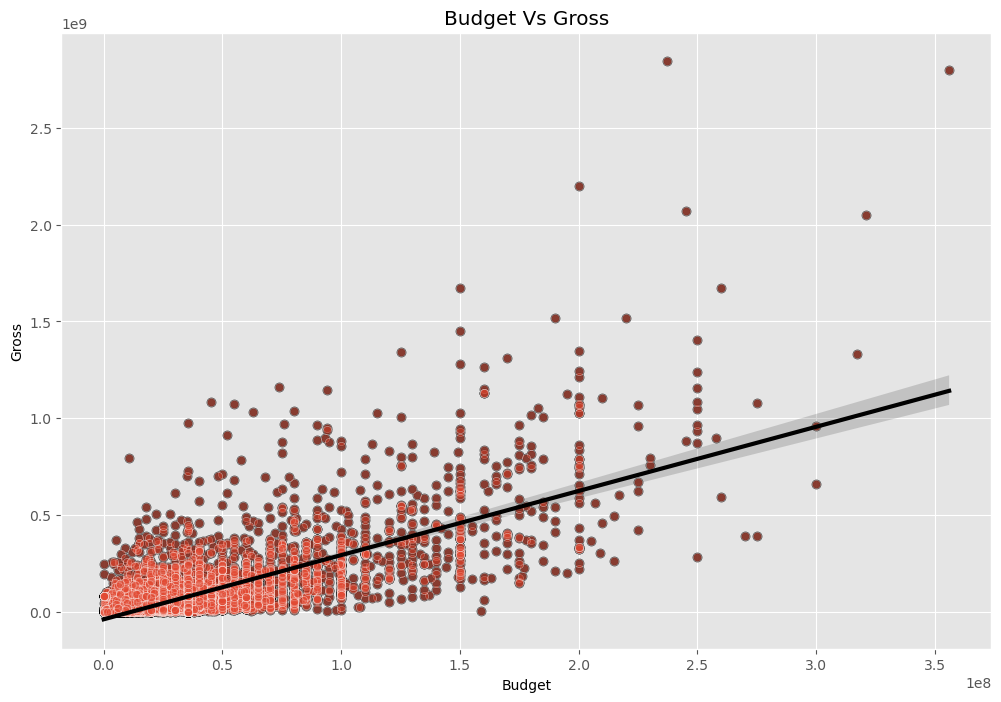

In [84]:

# create the regression plot with custom parameters
sns.regplot(x=df["budget"], y=df["gross"], color='black', line_kws={'linewidth':3})
sns.scatterplot(x=df["budget"], y=df["gross"], alpha=0.5)

# add labels and title
plt.title("Budget Vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")

# display the plot
plt.show()


In [85]:
# calculate the correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.265578  0.252042  0.120811
score    0.097995  1.000000  0.409182  0.064554  0.182868  0.399451
votes    0.222945  0.409182  1.000000  0.421090  0.628713  0.309212
budget   0.265578  0.064554  0.421090  1.000000  0.711270  0.265305
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241336
runtime  0.120811  0.399451  0.309212  0.265305  0.241336  1.000000


C:\Users\mavur\AppData\Local\Temp\ipykernel_22692\2112970164.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [89]:
df.corr(method='pearson') #pearson,Kendall,spearman 

C:\Users\mavur\AppData\Local\Temp\ipykernel_22692\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.399451,0.309212,0.265305,0.241336,1.000000


C:\Users\mavur\AppData\Local\Temp\ipykernel_22692\423834495.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


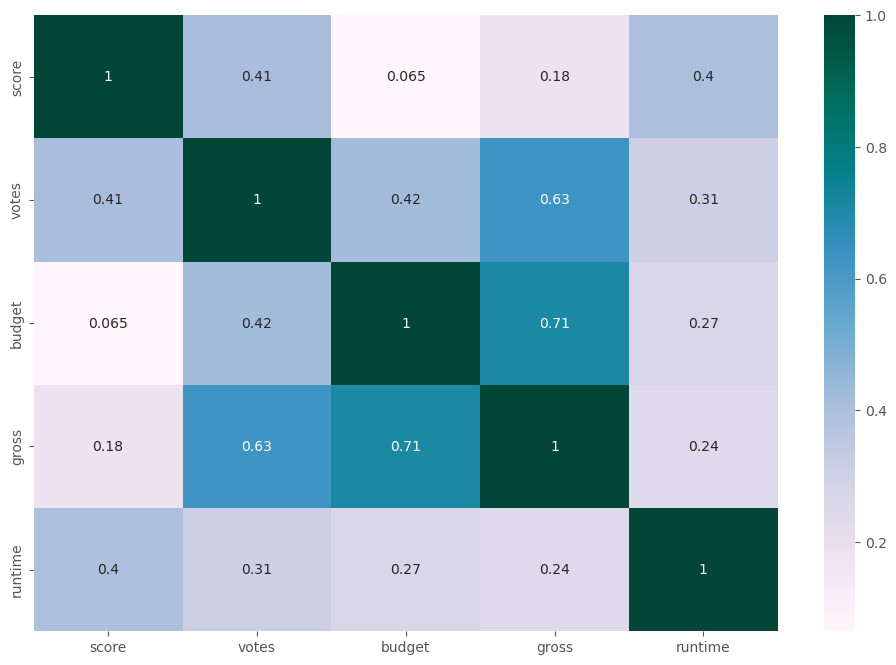

In [94]:
corr_matrix = df.corr(method='pearson')

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn')

# Show plot
plt.show()

In [95]:
df.dtypes


name               object
rating             object
genre              object
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget              int64
gross               int64
company            object
runtime           float64
year_corrected     object
dtype: object

In [126]:
df_numerized = df.copy()  # creating a copy of the original dataframe

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category').cat.codes

# Print the updated dataframe
df_numerized.head()



,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [117]:
# Using factorize - this assigns a random numeric value for each unique categorical value

dfdf.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
name,1.000000,0.145480,0.036367,0.960206,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.275691,0.947540,0.591667,0.048955,0.819948
rating,0.145480,1.000000,-0.086921,0.151582,0.012705,0.101796,0.087517,0.105405,0.095374,0.003090,0.192871,0.158306,-0.025795,0.033327,0.138045
genre,0.036367,-0.086921,1.000000,0.036853,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.069445,0.038635,0.009566,0.001462,0.028570
released,0.960206,0.151582,0.036853,1.000000,-0.045382,0.302238,0.769387,0.821186,0.753962,0.146635,0.289433,0.977086,0.604173,0.049206,0.848142
score,-0.046733,0.012705,-0.002437,-0.045382,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.011749,-0.047004,-0.028432,0.026436,-0.038776
votes,0.287776,0.101796,0.023285,0.302238,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.395374,0.286308,0.008900,0.106024,0.276969
director,0.745905,0.087517,0.047288,0.769387,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.108033,0.751149,0.552258,-0.011070,0.641912
writer,0.805211,0.105405,0.033688,0.821186,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.186680,0.805784,0.546151,0.032264,0.706832
star,0.731565,0.095374,0.038649,0.753962,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.110870,0.735911,0.527116,0.035392,0.638927
country,0.142828,0.003090,-0.015795,0.146635,0.023097,-0.045914,0.155471,0.157202,0.182045,1.000000,-0.068884,0.134123,0.226346,0.124154,0.112782


In [118]:
df_numerized.corr(method='pearson')

C:\Users\mavur\AppData\Local\Temp\ipykernel_22692\2727287532.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_numerized.corr(method='pearson')


,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.399451,0.309212,0.265305,0.241336,1.000000


In [119]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

C:\Users\mavur\AppData\Local\Temp\ipykernel_22692\1290311030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = df_numerized.corr()


score    score      1.000000
         votes      0.409182
         budget     0.064554
         gross      0.182868
         runtime    0.399451
votes    score      0.409182
         votes      1.000000
         budget     0.421090
         gross      0.628713
         runtime    0.309212
budget   score      0.064554
         votes      0.421090
         budget     1.000000
         gross      0.711270
         runtime    0.265305
gross    score      0.182868
         votes      0.628713
         budget     0.711270
         gross      1.000000
         runtime    0.241336
runtime  score      0.399451
         votes      0.309212
         budget     0.265305
         gross      0.241336
         runtime    1.000000
dtype: float64

In [123]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   score      0.064554
score    budget     0.064554
         gross      0.182868
gross    score      0.182868
runtime  gross      0.241336
gross    runtime    0.241336
budget   runtime    0.265305
runtime  budget     0.265305
         votes      0.309212
votes    runtime    0.309212
runtime  score      0.399451
score    runtime    0.399451
votes    score      0.409182
score    votes      0.409182
budget   votes      0.421090
votes    budget     0.421090
gross    votes      0.628713
votes    gross      0.628713
budget   gross      0.711270
gross    budget     0.711270
score    score      1.000000
budget   budget     1.000000
votes    votes      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

In [125]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr


gross    votes      0.628713
votes    gross      0.628713
budget   gross      0.711270
gross    budget     0.711270
score    score      1.000000
budget   budget     1.000000
votes    votes      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

In [ ]:
#Votes and Budget have High Correlation to Gross Earnings